In [1]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from sklearn.decomposition import PCA
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from analysis import *
from utils import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Trainability

## 1D function

### Generate Data

In [ ]:
np.random.seed(42)
n = 100
x = np.linspace(0, 1, n).reshape(-1,1)
y = gaussian(x, 0.3, 0.01) + gaussian(x, 0.7, 0.01) 

x = scaler(x, a=0, b=np.pi)
y = scaler(y, a=0.1, b=0.9)
print(y.shape)

In [ ]:
plt.plot(x, y, 'o')
plt.show()

### Training Models

In [2]:
backend = Aer.get_backend('qasm_simulator')

In [ ]:
np.random.seed(42)

qnn_list = []
for i in range(1):
    qnn = sequential_qnn(q_bits = [1, 3],
                         dim = [1, 3, 1],
                         reps = 1,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=50)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_1D"))

In [ ]:
np.random.seed(42)
dnn_list = []
for i in range(1):
    dnn = sequential_dnn(dim = [1, 3, 1],
                     lr = 0.1)
    
    dnn.train(x, y, epochs=5000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_1D"))

## 2D function

### Generate Data

In [15]:
np.random.seed(42)
n = 20
x1 = np.linspace(0, 1, n)
x2 = np.linspace(0, 1, n)

x1, x2 = np.meshgrid(x1,x2)

x1, x2 = np.ravel(x1).reshape(-1,1), np.ravel(x2).reshape(-1,1) 

x = np.hstack((x1, x2))

mean1 = np.array([[0.3, 0.7]])
var1 = np.array([[0.01, 0], [0, 0.01]])

mean2 = np.array([[0.7, 0.3]])
var2 = np.array([[0.01, 0], [0, 0.01]])

mean3 = np.array([[0.3, 0.3]])
var3 = np.array([[0.01, 0], [0, 0.01]])

mean4 = np.array([[0.7, 0.7]])
var4 = np.array([[0.01, 0], [0, 0.01]])

y = gaussian(x, mean1, var1) + gaussian(x, mean2, var2) - gaussian(x, mean3, var3) - gaussian(x, mean4, var4)

x = scaler(x, a=0, b=np.pi)
y = scaler(y, a=0.1, b=0.9)

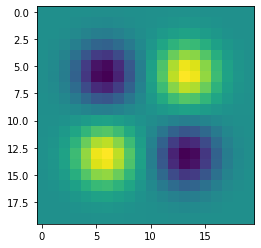

In [17]:
plt.imshow(y.reshape(20,20))
plt.show()

### Training Models

In [18]:
np.random.seed(42)

qnn_list = []
for i in range(1):
    qnn = sequential_qnn(q_bits = [2, 3],
                         dim = [2, 3, 1],
                         reps = 1,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=50, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_2D"))

  0%|          | 0/50 [00:00<?, ?it/s]

epoch: 0, loss: 0.03715635682648045
epoch: 1, loss: 0.027770038135022136
epoch: 2, loss: 0.024014697738304305
epoch: 3, loss: 0.02185194146704654
epoch: 4, loss: 0.020487374069636494
epoch: 5, loss: 0.01912569853849363
epoch: 6, loss: 0.0182355972805561
epoch: 7, loss: 0.01773507004961577
epoch: 8, loss: 0.017821960744346152
epoch: 9, loss: 0.018095120493033242
epoch: 10, loss: 0.01856508751835931
epoch: 11, loss: 0.018756900115060694
epoch: 12, loss: 0.018477967059730437
epoch: 13, loss: 0.017950039710999847
epoch: 14, loss: 0.017146102049325172
epoch: 15, loss: 0.016268266075732448
epoch: 16, loss: 0.015627743136663073
epoch: 17, loss: 0.014920207073165537
epoch: 18, loss: 0.014432692961698069
epoch: 19, loss: 0.013844549441148267
epoch: 20, loss: 0.013281077136663069
epoch: 21, loss: 0.0129120540174869
epoch: 22, loss: 0.012725988742846934
epoch: 23, loss: 0.012655000714050844
epoch: 24, loss: 0.012741475286354095
epoch: 25, loss: 0.01256044994696309
epoch: 26, loss: 0.0119319565879

In [23]:
np.random.seed(42)
dnn_list = []
for i in range(1):
    dnn = sequential_dnn(dim = [2, 3, 1],
                     lr = 0.1)
    
    dnn.train(x, y, epochs=5000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_2D"))